In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in csv
shipstation = pd.read_csv("Shipstation Orders 010121_113021.csv")

In [3]:
#remove spaces in column names and replace with underscores
shipstation.columns = shipstation.columns.str.replace(' ', '_')

In [4]:
#lower case column names to make coding easier
shipstation.columns = [x.lower() for x in shipstation.columns]

In [5]:
#check out top 5 rows
shipstation.head()

,name,state,customer_email,carrier_selected,store_name,order_number,order_date,order_total,shipping_cost,order_weight
0,Amy Walden,NC,NaN,UPS,PP,PP17992,3/1/21 12:51,404.4,10.65,384.0
1,MATT,IN,NaN,FedEx,M Vendors,2-6764288-6729805,8/17/21 0:00,0.0,9.50,40.0
2,"""""PO0206801 US BOLT/BUILDING 6",TX,NaN,USPS,M Vendors,869197-819,4/29/21 0:00,0.0,3.35,2.0
3,"""""PO0206801 US BOLT/BUILDING 6",TX,NaN,USPS,M Vendors,869197-822,4/30/21 0:00,0.0,3.35,2.0
4,"""""PO112735S FABRIWELD CORPORATION",OH,NaN,USPS,M Vendors,06515-59792,2/3/21 0:00,0.0,3.06,4.0


In [6]:
#check column info and see if we need to update any datatypes
shipstation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39337 entries, 0 to 39336
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              39337 non-null  object 
 1   state             39337 non-null  object 
 2   customer_email    35755 non-null  object 
 3   carrier_selected  39337 non-null  object 
 4   store_name        39337 non-null  object 
 5   order_number      39337 non-null  object 
 6   order_date        39337 non-null  object 
 7   order_total       39337 non-null  float64
 8   shipping_cost     39337 non-null  float64
 9   order_weight      39337 non-null  float64
dtypes: float64(3), object(7)
memory usage: 3.0+ MB


In [7]:
#update datatypes
shipstation['order_date'] = pd.to_datetime(shipstation['order_date'])

#update the following objects to be categories for code efficiency
shipstation['store_name'] = shipstation['store_name'].astype('category')
shipstation['carrier_selected'] = shipstation['carrier_selected'].astype('category')
shipstation['state'] = shipstation['state'].astype('category')
shipstation['order_total'] = shipstation['order_total'].astype('float32')
shipstation['shipping_cost'] = shipstation['shipping_cost'].astype('float32')
shipstation['order_weight'] = shipstation['order_weight'].astype('float32')

In [8]:
#extract all QQ.com orders
qq_studio = shipstation[shipstation['store_name'] == 'QQ.com']

#check first 5 rows
qq_studio.head()

,name,state,customer_email,carrier_selected,store_name,order_number,order_date,order_total,shipping_cost,order_weight
32,A. GALLUP,CT,gallupperfume@gmail.com,USPS,QQ.com,QQs-3540,2021-03-26 15:13:00,22.170000,4.04,9.0
33,A. Leigh Lozinak,CA,aleighlozinak@yahoo.com,FedEx,QQ.com,QQs-4134,2021-05-24 00:38:00,54.590000,9.50,48.0
36,A.J. Flores,TX,flrsattivita@gmail.com,USPS,QQ.com,QQs-2945,2021-01-27 22:03:00,23.990000,7.40,23.0
40,Aalia Golden,AZ,thrive@sedonavibranthealth.com,FedEx,QQ.com,QQs-3607,2021-04-02 01:15:00,80.699997,7.50,42.5
41,Aalia Golden,AZ,thrive@sedonavibranthealth.com,FedEx,QQ.com,QQs-4675,2021-07-09 19:47:00,37.950001,7.50,20.0


In [9]:
# extracts day number
qq_studio['day_number'] = qq_studio['order_date'].dt.dayofweek

# extracts month
qq_studio['month_number'] = qq_studio['order_date'].dt.month

# extracts hour (0 = 12am, 23 = 11pm)
qq_studio['hour'] = qq_studio['order_date'].dt.hour

# extracts year
qq_studio['year'] = qq_studio['order_date'].dt.year

In [10]:
#sanity check, confirm there are values from 0 to 6
qq_studio['day_number'].unique()

array([4, 0, 2, 3, 5, 6, 1], dtype=int64)

In [11]:
# converts day numbers to day of week values
## creates day_map_dictionary
day_map_dictionary = {0:'Monday',
                      1:'Tuesday',
                      2:'Wednesday',
                      3:'Thursday',
                      4:'Friday',
                      5:'Saturday',
                      6:'Sunday'}

# creates new features and applies map dictionary
qq_studio['day_of_week'] = qq_studio['day_number'].map(day_map_dictionary)

# drops day_number feature
qq_studio.drop('day_number', axis=1, inplace=True)

# converts month numbers to month values
## creates month_map_dictionary
month_map_dictionary = {1:'January',
                        2:'February',
                        3:'March',
                        4:'April',
                        5:'May',
                        6:'June',
                        7:'July',
                        8:'August',
                        9:'September',
                       10:'October',
                       11:'November',
                       12:'December'}

# creates new features and applies map dictionary
qq_studio['month'] = qq_studio['month_number'].map(month_map_dictionary)

# drops day_number feature
qq_studio.drop('month_number', axis=1, inplace=True)

# returns 5 records 
qq_studio.head()

,name,state,customer_email,carrier_selected,store_name,order_number,order_date,order_total,shipping_cost,order_weight,hour,year,day_of_week,month
32,A. GALLUP,CT,gallupperfume@gmail.com,USPS,QQ.com,QQs-3540,2021-03-26 15:13:00,22.170000,4.04,9.0,15,2021,Friday,March
33,A. Leigh Lozinak,CA,aleighlozinak@yahoo.com,FedEx,QQ.com,QQs-4134,2021-05-24 00:38:00,54.590000,9.50,48.0,0,2021,Monday,May
36,A.J. Flores,TX,flrsattivita@gmail.com,USPS,QQ.com,QQs-2945,2021-01-27 22:03:00,23.990000,7.40,23.0,22,2021,Wednesday,January
40,Aalia Golden,AZ,thrive@sedonavibranthealth.com,FedEx,QQ.com,QQs-3607,2021-04-02 01:15:00,80.699997,7.50,42.5,1,2021,Friday,April
41,Aalia Golden,AZ,thrive@sedonavibranthealth.com,FedEx,QQ.com,QQs-4675,2021-07-09 19:47:00,37.950001,7.50,20.0,19,2021,Friday,July


In [12]:
qq_studio['shipping_cost_per_oz'] = qq_studio['shipping_cost'] / qq_studio['order_weight']

# Monthly Level Analysis

We would like to look into the following:

1. What has sales trend been like over time?
2. What has shipping cost trends been like over time?

In [13]:
#pivot data so that we have order total sum values by month 
monthly_order_total = qq_studio.groupby('month')['order_total'].sum()

In [14]:
monthly_order_total = monthly_order_total.reset_index()

In [15]:
#create reverse month dictionary to map month string to month number
reverse_month_map_dictionary = {'January':1,
                       'February':2,
                        'March':3,
                        'April':4,
                        'May':5,
                        'June':6,
                        'July':7,
                        'August':8,
                        'September':9,
                       'October':10,
                       'November':11,
                       'December':12}

monthly_order_total['month_number'] = monthly_order_total['month'].map(reverse_month_map_dictionary)

In [16]:
monthly_order_total = monthly_order_total.sort_values(by='month_number', ascending=True)
monthly_order_total.drop('month_number', axis=1, inplace=True)

#filter out December since we only have 1 day of data for December
monthly_order_total = monthly_order_total[monthly_order_total['month'] != 'December']

In [17]:
monthly_order_total

,month,order_total
4,January,33938.480469
3,February,27102.720703
7,March,47534.078125
0,April,51875.789062
8,May,38010.820312
6,June,39590.781250
5,July,40476.488281
1,August,39829.660156
11,September,48041.035156
10,October,48153.929688


<AxesSubplot:xlabel='month', ylabel='order_total'>

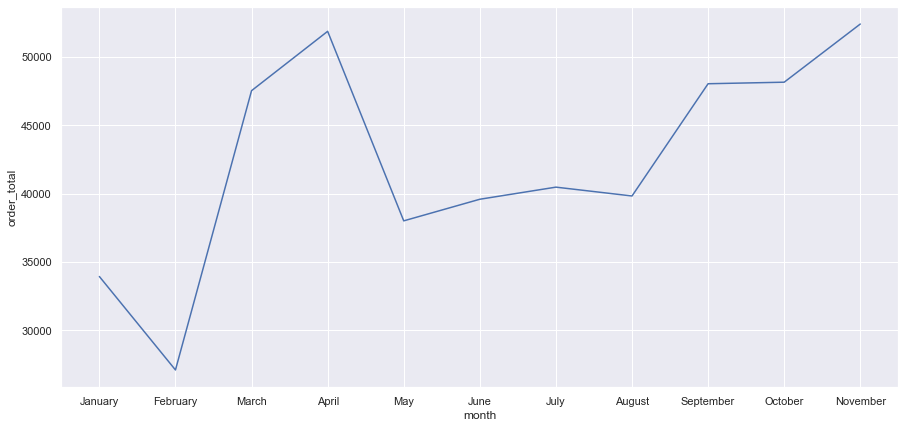

In [18]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=monthly_order_total, x='month', y='order_total')

QQ-Studio.com sales have been trending upwards overall each month, with a noticable peak during April and November. We have seen similar patterns on our other marketplaces as well which suggests that there is seasonality in the business. We will need more data to do a seasonality decomposition analysis. Let's take a look at the order value trend per month.

In [19]:
#create a list of months for the order call in the boxplot
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
boxplot_data = qq_studio[qq_studio['month'] != 'December']

<AxesSubplot:xlabel='month', ylabel='order_total'>

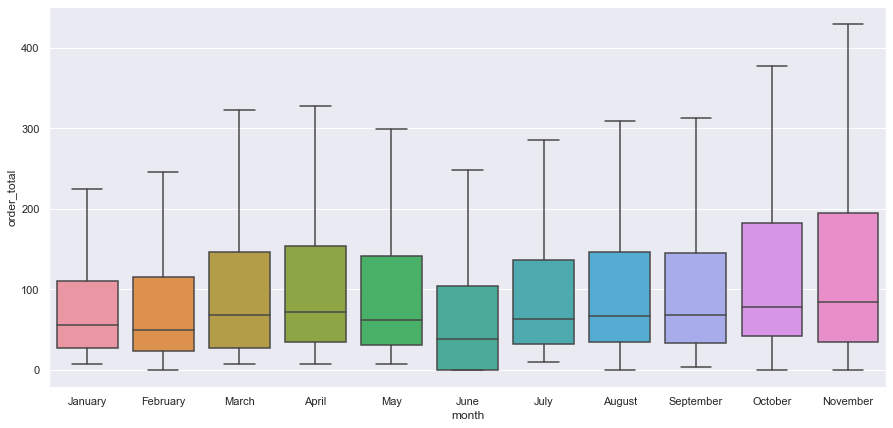

In [20]:
sns.boxplot(data=boxplot_data, x='month', y='order_total', order=months, sym="")

The median order value follows a similar trend to the total sales per month as seen in the boxplot. However, what the lineplot didn't show was that there has been a right skew starting in October, where the third quartile band has gone up drastically. This is an indicator that we received some big orders in October and November. Now let's see which states contribute the most to these sales.

In [21]:
#create a dictionary to map out US states and regions
##this is to identify which orders are international orders
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

#map US states to the dataframe
qq_studio['us_states'] = qq_studio['state'].map(abbrev_to_us_state)

In [22]:
states_data = qq_studio.dropna()

In [23]:
#check to make sure all NaNs got dropped
states_data['us_states'].unique()

array(['Connecticut', 'California', 'Texas', 'Arizona', 'Hawaii',
       'New York', 'Illinois', 'Virginia', 'Louisiana', 'Colorado',
       'Massachusetts', 'Indiana', 'Michigan', 'Florida',
       'North Carolina', 'Alabama', 'Oregon', 'Georgia', 'New Jersey',
       'Iowa', 'Kansas', 'Nevada', 'New Mexico', 'Montana', 'Missouri',
       'Pennsylvania', 'Ohio', 'Alaska', 'Tennessee', 'Arkansas',
       'Kentucky', 'Minnesota', 'Puerto Rico', 'Washington',
       'South Carolina', 'Maryland', 'Wisconsin', 'South Dakota',
       'Oklahoma', 'Maine', 'Mississippi', 'Nebraska', 'Delaware',
       'North Dakota', 'Utah', 'New Hampshire', 'West Virginia',
       'Vermont', 'Idaho', 'District of Columbia', 'Rhode Island',
       'Wyoming', 'U.S. Virgin Islands'], dtype=object)

In [24]:
#group sales by state and reset index
sales_by_state = states_data.groupby('us_states')['order_total'].sum()
sales_by_state = sales_by_state.reset_index()

#create sales_proportion feature so we can sort to the top 5 states
sales_by_state['sales_proportion'] = sales_by_state['order_total'] / sum(sales_by_state['order_total'])

#sort values in descending order by sales_proportion
sales_by_state = sales_by_state.sort_values(by='sales_proportion', ascending=False)

In [25]:
#top 10 states by sales
sales_by_state.head(10)

,us_states,order_total,sales_proportion
32,New York,64583.808594,0.141315
4,California,51925.101562,0.113616
9,Florida,48481.140625,0.106081
44,Texas,32427.019531,0.070953
21,Massachusetts,20128.109375,0.044042
25,Missouri,16623.849609,0.036374
46,Utah,14101.429688,0.030855
38,Pennsylvania,13169.540039,0.028816
43,Tennessee,12722.750000,0.027838
27,Nebraska,12467.379883,0.027280


In [26]:
#slice data using Pandas query for just the rows for these 10 states
top_states = states_data.query("us_states in ['New York', 'California', 'Florida', 'Texas', 'Massachusetts', \
                                                'Missouri', 'Utah', 'Pennsylvania', 'Tennessee', 'Nebraska']")

In [27]:
top_states['us_states'].unique()

array(['California', 'Texas', 'New York', 'Massachusetts', 'Florida',
       'Missouri', 'Pennsylvania', 'Tennessee', 'Nebraska', 'Utah'],
      dtype=object)

In [28]:
top_states_grouped = top_states.groupby(['month', 'us_states'])['order_total'].sum()
top_states_grouped = top_states_grouped.reset_index()

top_states_grouped['month_number'] = top_states_grouped['month'].map(reverse_month_map_dictionary)
top_states_grouped = top_states_grouped.sort_values(by=['month_number', 'us_states'], ascending=True)

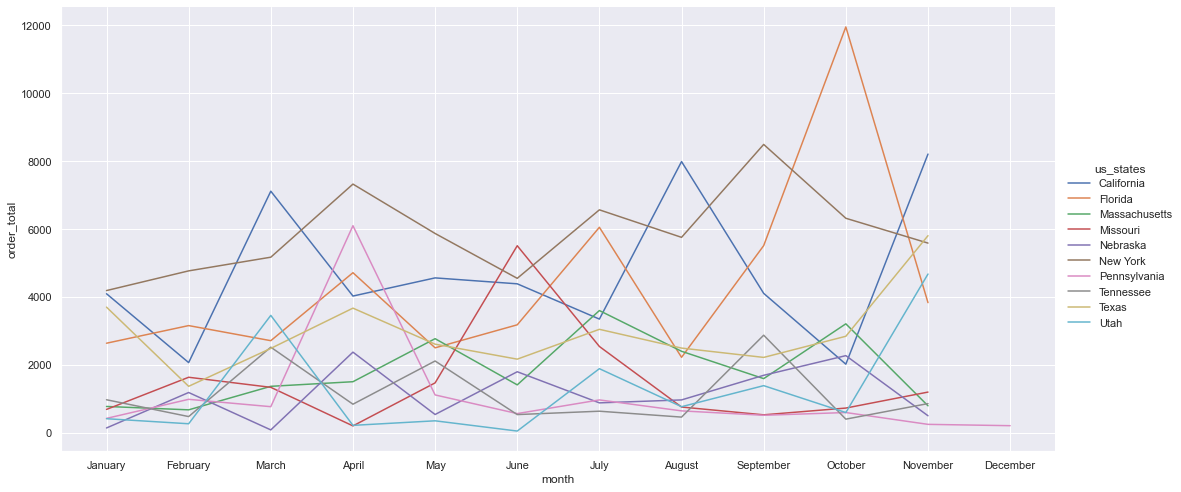

In [29]:
sns.relplot(data=top_states_grouped, x="month", y="order_total", kind="line", ci=None, hue="us_states", \
           height=7, aspect=15/7)

The majority of these 10 states had peak sales numbers in April with the exception of California, Florida and New York. California had multiple peaks, one in March, one in August and one in November. New York had two peaks, one in April and one in September. Florida had its biggest peak in October. This suggests that the buying pattern of our customers differ based on the state they live in. This may be good to consider for marketing materials purposes. Let's explore shipping cost trends now.

<AxesSubplot:xlabel='month', ylabel='shipping_cost_per_oz'>

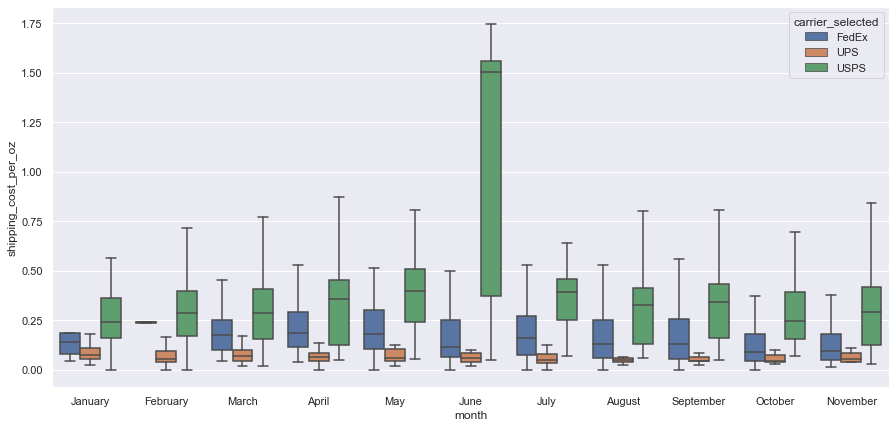

In [30]:
#create a boxplot of shipping cost per oz for each carrier
sns.boxplot(data=states_data, x='month', y='shipping_cost_per_oz', hue='carrier_selected', order=months, sym="")

It looks like USPS is the most expensive, followed by FedEx and then UPS. Does the total order volume for each carrier play into this cost efficiency discrepancy?

<AxesSubplot:xlabel='carrier_selected', ylabel='count'>

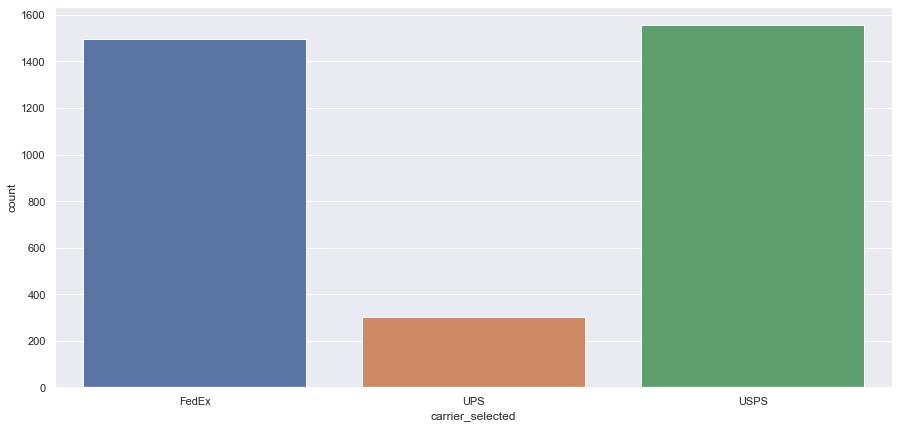

In [31]:
#check the counts of orders for each carrier selected
sns.countplot(data=states_data, x='carrier_selected')

<AxesSubplot:xlabel='carrier_selected', ylabel='order_total'>

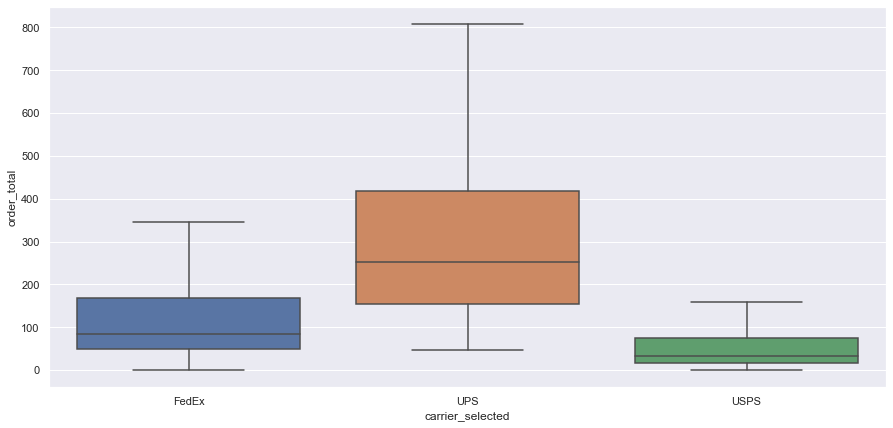

In [32]:
#check boxplot stats of the order totals for these three carriers
sns.boxplot(data=states_data, x='carrier_selected', y='order_total', sym="")

The median order total is the smallest for the USPS but its median shipping cost per oz is the highest. Does this have anything to do with the order weight? Are we getting better rates for shipping heavier items with FedEx and UPS? 

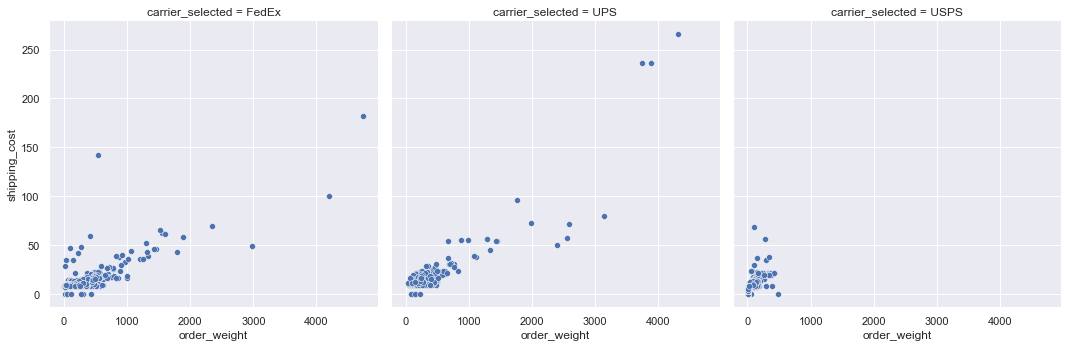

In [33]:
sns.relplot(data=states_data, x="order_weight", y="shipping_cost", kind="scatter", col='carrier_selected')

From the relational scatter plot, it looks like USPS order weights are more densely concentrated towards lighter packages and have a high range of shipping cost compared to both UPS and FedEx. UPS and FedEx have a smaller range of shipping cost for similar order weights. Could this be due to the selection of carriers based off shipping zones?

In [34]:
#import another csv file that has shipping cost data + zones since the first dataset did not have this
zone_data = pd.read_csv("Shipstation Zone Data 010121_113021.csv")

In [35]:
#remove spaces in column names and replace with underscores
zone_data.columns = zone_data.columns.str.replace(' ', '_')

#lower case column names to make coding easier
zone_data.columns = [x.lower() for x in zone_data.columns]

In [36]:
zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3414 entries, 0 to 3413
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3414 non-null   object 
 1   state             3409 non-null   object 
 2   customer_email    3413 non-null   object 
 3   carrier_selected  3411 non-null   object 
 4   store_name        3414 non-null   object 
 5   order_number      3414 non-null   object 
 6   order_date        3414 non-null   object 
 7   order_total       3414 non-null   float64
 8   shipping_cost     3414 non-null   float64
 9   zone              3385 non-null   float64
 10  order_weight      3414 non-null   float64
dtypes: float64(4), object(7)
memory usage: 293.5+ KB


In [37]:
zone_data = zone_data.dropna()

In [38]:
#update datatypes
zone_data['order_date'] = pd.to_datetime(zone_data['order_date'])
zone_data['store_name'] = zone_data['store_name'].astype('category')
zone_data['carrier_selected'] = zone_data['carrier_selected'].astype('category')
zone_data['state'] = zone_data['state'].astype('category')
zone_data['order_total'] = zone_data['order_total'].astype('float32')
zone_data['shipping_cost'] = zone_data['shipping_cost'].astype('float32')
zone_data['order_weight'] = zone_data['order_weight'].astype('float32')
zone_data['zone'] = zone_data['zone'].astype('int')

In [39]:
zone_data.head()

,name,state,customer_email,carrier_selected,store_name,order_number,order_date,order_total,shipping_cost,zone,order_weight
0,Andia Hartland,MN,andia.hartland@yahoo.com,USPS,QQ.com,QQs-2675,2021-01-01 10:01:00,12.590000,3.39,6,6.0
1,Kimberly Steele-McNeal,IN,ksteelemcneal@yahoo.com,USPS,QQ.com,QQs-2674,2021-01-01 09:03:00,70.389999,7.75,5,57.0
2,Alicia Dean,OH,alicia86@gmail.com,USPS,QQ.com,QQs-2673,2021-01-01 08:48:00,117.889999,9.42,4,112.0
3,Paul Miller,TX,sendto.paulmiller@gmail.com,UPS,QQ.com,QQs-2672,2021-01-01 05:36:00,75.309998,11.72,6,64.0
4,Kurt Miller,IL,kurt.miller@gmail.com,USPS,QQ.com,QQs-2677,2021-01-01 15:45:00,56.160000,7.75,5,34.0


In [40]:
#create zone map dictionary
zone_map_dictionary = {1:'0-50',
                      2:'51-150',
                      3:'151-300',
                      4:'301-600',
                      5:'601-1000',
                      6:'1001-1400',
                      7:'1401-1800',
                      8: '1801+'}

#create a new feature that maps to the zone map dictionary
zone_data['shipping_distance'] = zone_data['zone'].map(zone_map_dictionary)

#map US states to the dataframe
zone_data['us_states'] = zone_data['state'].map(abbrev_to_us_state)

In [41]:
#create shipping cost efficiency feature
zone_data['shipping_cost_per_oz'] = zone_data['shipping_cost'] / zone_data['order_weight']

<AxesSubplot:xlabel='shipping_distance', ylabel='shipping_cost_per_oz'>

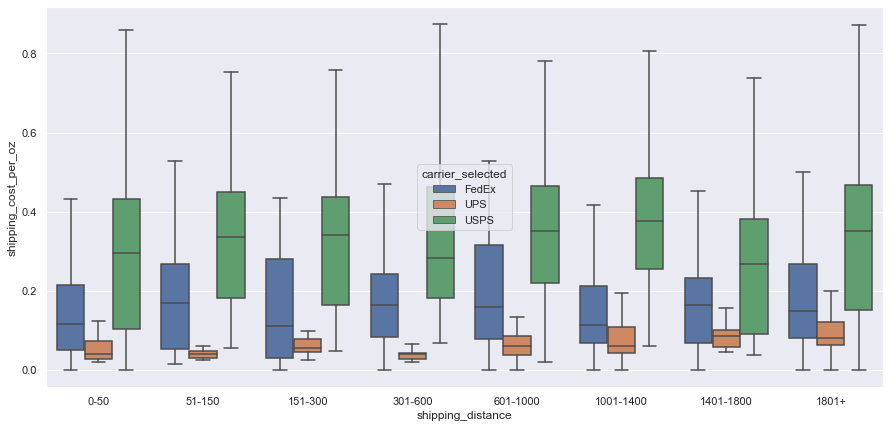

In [42]:
shipping_order = ['0-50', '51-150', '151-300', '301-600', '601-1000', '1001-1400', '1401-1800', '1801+']

#create a boxplot of shipping cost per oz for each carrier by zone
sns.boxplot(data=zone_data, x='shipping_distance', y='shipping_cost_per_oz', hue='carrier_selected', order=shipping_order, sym="")

<AxesSubplot:xlabel='shipping_distance', ylabel='order_total'>

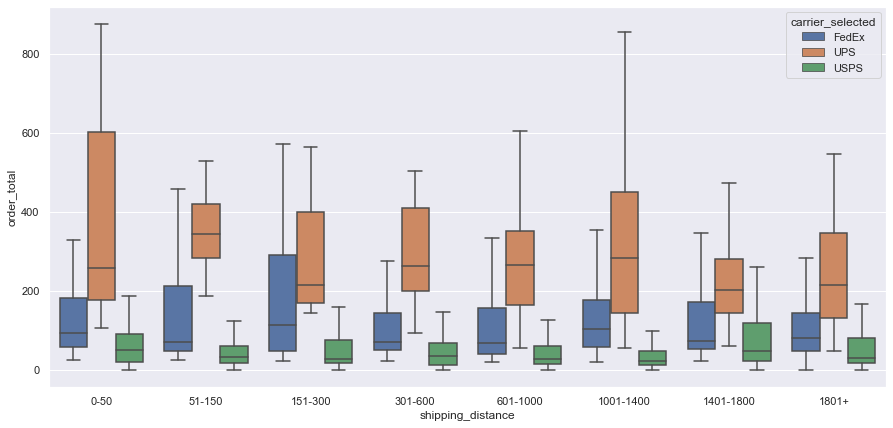

In [43]:
#create a boxplot of order total for each carrier by zone
sns.boxplot(data=zone_data, x='shipping_distance', y='order_total', hue='carrier_selected', order=shipping_order, sym="")

USPS is noticably more expensive compared to FedEx and UPS while having the lowest median order value. This pattern is consistent across the 8 different shipping zones that we ship to. It appears that UPS is being used for heavier orders, FedEx is being used for in-between sized orders and USPS is being used for lighter orders. Since there is a flat $3.75 fee for USPS First Class mail that can be as light as 2 ounces, this may be why shipping_cost_per_oz is skewed for USPS. Let's try to confirm this.

In [44]:
#find the average order weight grouped up by carrier
zone_data_grouped = zone_data.groupby('carrier_selected')['order_weight'].mean()
print(zone_data_grouped)

carrier_selected
FedEx    144.134476
UPS      338.591003
USPS      48.322495
Name: order_weight, dtype: float32


It looks like my hypothesis was correct so there may not be many optimization opportunities from a shipping cost perspective. Let's take a look at some day of week level trends

# Day Of Week Analysis

We would like to see:

1. Which day of the week has the highest and lowest median order value
2. Which state from the top 10 states identified earlier drove the highest median order value
3. At what hour of the day do we have the highest median order value

By knowing these three factors, we can fine tune our customer service as well as any marketing promo launches

<AxesSubplot:xlabel='day_of_week', ylabel='order_total'>

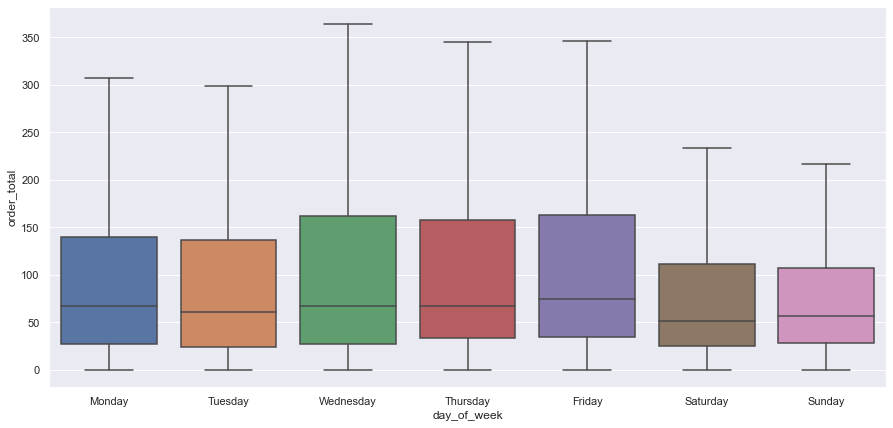

In [47]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#create boxplot of order_total by day of week
sns.boxplot(data=qq_studio, x='day_of_week', y='order_total', order=days, sym="")

The highest median order value occurs on Fridays, while Wednesday comes in second. Despite Wednesday being second, it has a higher variability than Friday as indicated by the bands on the boxplot. Marketing promotions should be held on these two days (Wednesdays and Fridays). Let's see if there are certain states from the top 10 states we looked at earlier that we prioritize on those two days.

<AxesSubplot:xlabel='day_of_week', ylabel='order_total'>

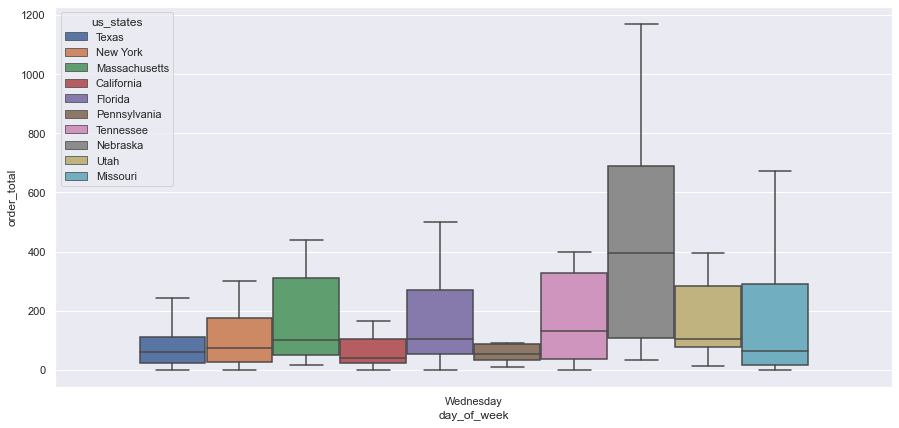

In [52]:
wednesday = top_states[top_states['day_of_week'] == 'Wednesday']
friday = top_states[top_states['day_of_week'] == 'Friday']

#create boxplot of order_total by top 10 states for Wednesday
sns.boxplot(data=wednesday, x='day_of_week', y='order_total', hue='us_states', sym="")

<AxesSubplot:xlabel='us_states', ylabel='count'>

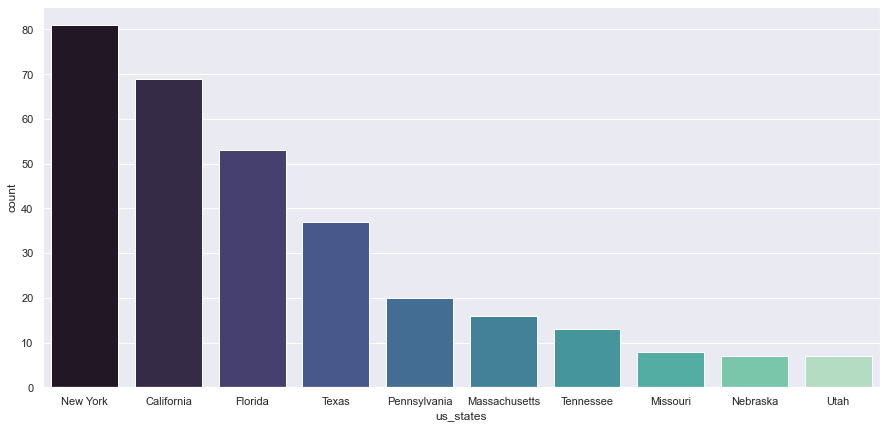

In [55]:
sns.countplot(data=wednesday, x='us_states', order=wednesday['us_states'].value_counts().index, palette="mako")

At a glance it looks like we should prioritize Nebraska, however, the countplot shows that for FY 2021, we only had 8 total orders that came from Nebraska on Wednesdays. We should wait for more data so that n >= 30 before we redo this analysis. For all states with n > 30, Florida notably has a higher median order value compared to Texas, California and New York. From a regional marketing focus, we should have some custom content directed to our Florida customers on Wednesdays. Let's take a look at Friday.

<AxesSubplot:xlabel='day_of_week', ylabel='order_total'>

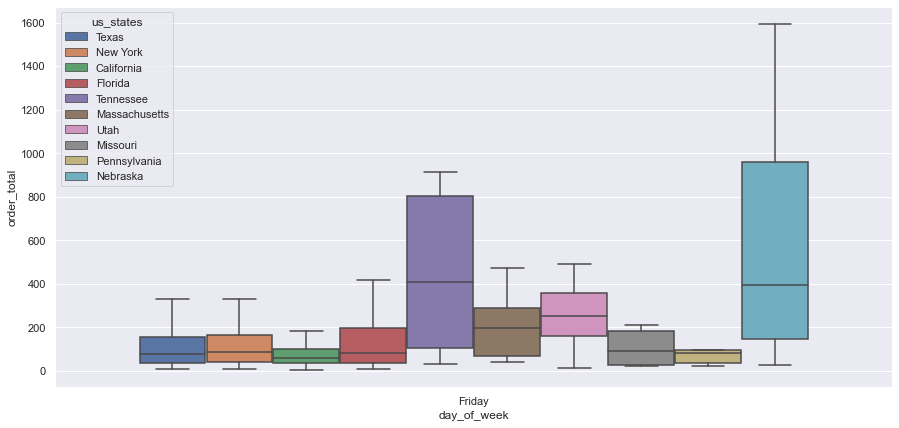

In [56]:
#create boxplot of order_total by top 10 states for Friday
sns.boxplot(data=friday, x='day_of_week', y='order_total', hue='us_states', sym="")

<AxesSubplot:xlabel='us_states', ylabel='count'>

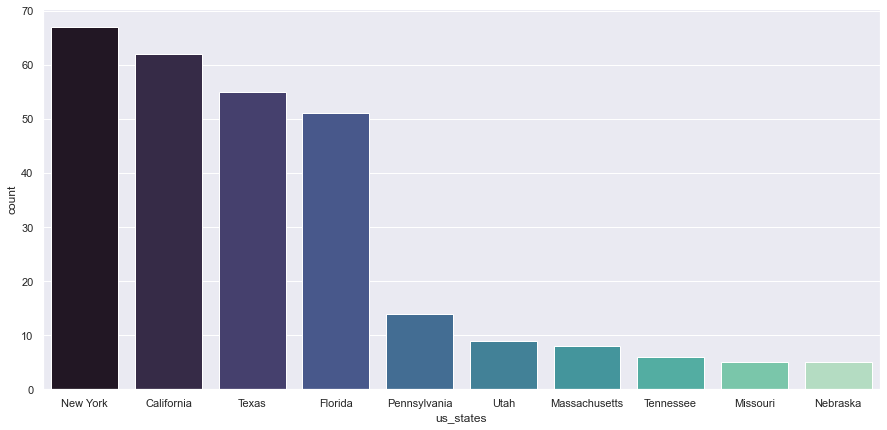

In [57]:
sns.countplot(data=friday, x='us_states', order=friday['us_states'].value_counts().index, palette="mako")

For Friday's, we see that Tennessee and Nebraska stand out but once again with a small sample size. For states where n > 30, New York slightly edges out over Florida (although Florida's order total amount has higher variability). For a regional marketing focus, it may be good to have custom content on Fridays for New York customers. Let's take a look at performance by hour of day.

<AxesSubplot:xlabel='hour', ylabel='order_total'>

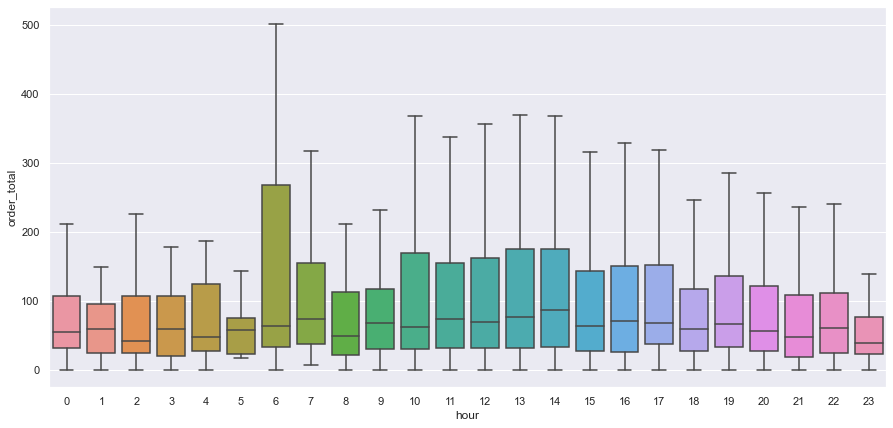

In [61]:
#create boxplot of order_total by hour of day EST (0 = 12am, 23 = 11pm)
sns.boxplot(data=qq_studio, x='hour', y='order_total', sym="")

At 2pm EST, we get the most expensive orders according to this boxplot. During this time window, it may be good to dedicate more resources to customer service and/or marketing outreach.